In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import os
import h5py

In [2]:
import ct_projector.projector.numpy as ct_projector

In [3]:
with h5py.File('./L291_full_sino.mat', 'r') as f:
    prj = np.copy(f['sino'])
prj = np.copy(prj.transpose([1, 0, 2])[np.newaxis], 'C')

In [4]:
projector = ct_projector.ct_projector()
projector.from_file('./projector_fan.cfg')
projector.nu = prj.shape[3]
projector.nv = prj.shape[2]
projector.nview = prj.shape[1]
projector.nz = prj.shape[2]
angles = projector.get_angles()

for v in vars(projector):
    print (v, '=', getattr(projector, v))

nview = 2304
nu = 736
nv = 103
nx = 640
ny = 640
nz = 103
dx = 0.75
dy = 0.75
dz = 1.0
cx = 0
cy = 0
cz = 0
dsd = 1086.5
dso = 595.0
du = 1.2858
dv = 1.0
off_u = -1.125
off_v = 0
geometry = <configparser.ConfigParser object at 0x7f2bde923790>


In [5]:
fprj = projector.ramp_filter(prj)
img = projector.fbp_fan_bp(fprj, angles)

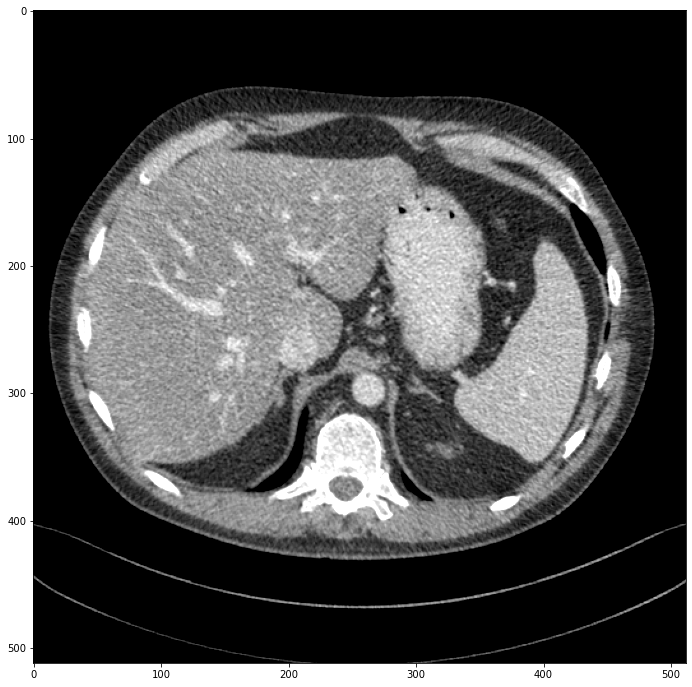

In [6]:
plt.figure(figsize = (12,12))
plt.imshow(img[0, img.shape[1]//2, 64:-64, 64:-64], 'gray', vmin=0.01596, vmax = 0.02356)

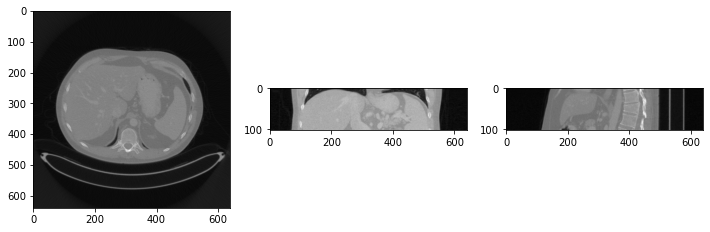

In [7]:
plt.figure(figsize = (12,4))
plt.subplot(131); plt.imshow(img[0, img.shape[1]//2, ...], 'gray', aspect=projector.dy / projector.dx)
plt.subplot(132); plt.imshow(img[0, :, img.shape[2]//2, :], 'gray', aspect=projector.dz / projector.dx)
plt.subplot(133); plt.imshow(img[0, ..., img.shape[3]//2], 'gray', aspect=projector.dz / projector.dx)

In [8]:
bp = projector.siddon_fan_bp(fprj, angles)